# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:

fifa['ValueNumeric'] = fifa['Value'].str.extract('(\d+\.?\d+)', expand=False)
fifa['ValueNumeric'] = pd.to_numeric(fifa['ValueNumeric'], errors='coerce')

type(fifa['ValueNumeric'][0])

numpy.float64

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('fifa.ValueNumeric ~ C(fifa["Position"]) + C(fifa["Preferred Foot"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

#ValueNumeric by Position and Preferred Foot
#normal to have NaN in residual because don't have these values

,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",8.506502e+06,26.0,3.871993,1.084192e-10
"C(fifa[""Preferred Foot""])",1.457462e+05,1.0,1.724861,1.890866e-01
Residual,1.403163e+09,16606.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
print(anova_table['PR(>F)'][0] < 0.05)
print(anova_table['PR(>F)'][1] < 0.05)

#In the code, we defined a model of value and position with 
#preferred foot. 

#The p-value for Position is very low, smaller than 0.05.
#Rejecting H0 that value is the same doesn't matter in which position a player plays.
#It means that position is statistically significant, depending on position, the value of the player is different


#The p-value for Preferred foot is higher than 0.05, can't reject H0
#It means that preferred foot is not statistically significant
#It doesn't matter which foot the player plays, the value will not differ


True
False


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:

model = ols('fifa.ValueNumeric ~ C(fifa["Nationality"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

C:\Users\krist\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",3.037007e+07,163.0,2.225754,6.889865e-17
Residual,1.382817e+09,16519.0,NaN,NaN


In [8]:
print(anova_table['PR(>F)'][0] < 0.05)

True


What is your conclusion from this ANOVA?

In [9]:
#the p value is lower than 0.05 so it's statistically significant, the value is different if the nationality is different

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
# Your code here:

percent_missing = fifa.isnull().sum()
percent_missing.loc[percent_missing > 0]

Club               241
Preferred Foot      48
Position            60
Weak Foot           48
Acceleration        48
SprintSpeed         48
Stamina             48
Strength            48
LongShots           48
Aggression          48
Interceptions       48
Positioning         48
Vision              48
Penalties           48
ValueNumeric      1525
dtype: int64

In [11]:
#how=any for any NaN to delete rows
fifa.dropna(axis=0, how='any', inplace=True)

In [12]:
#checking if really deleted
percent_missing = fifa.isnull().sum()
percent_missing.loc[percent_missing > 0]

Series([], dtype: int64)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [13]:
#dependent variable - value
#and independent variable(s) - stamina and sprint speed

#Linear relationship basically means that when one (or more) independent variables increases (or decreases), 
#the dependent variable increases (or decreases) too

In [14]:
# Your code here:
# predicting value using stamina and sprint speed

import statsmodels.api as sm

X = fifa[["Stamina", "SprintSpeed"]] # X our input variables (or independent variables)
y = fifa["ValueNumeric"] # Y our output/dependent variable
X = sm.add_constant(X) # adding an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # sm.OLS(output, input)
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\krist\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.441
Date:                Sun, 22 Mar 2020   Prob (F-statistic):             0.0871
Time:                        18:04:26   Log-Likelihood:            -1.1799e+05
No. Observations:               16634   AIC:                         2.360e+05
Df Residuals:                   16631   BIC:                         2.360e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         270.7652     10.738     25.215      0.000     249.717     291.813
Stamina        -0.1357      0.181     -0.751      0.452      -0.490       0.218
SprintSpeed     0.4107      0.196      2.095      0.036       0.026       0.795
==============================================================================
Omnibus:                     2176.964   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1756.491
Skew:                           0.706   Prob(JB):                         0.00
Kurtosis:                       2.263   Cond. No.                         438.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [15]:
# Your conclusions here:

#We can see here that this model has R-squared value — 0.000, meaning that this model explains 0% of the variance 
#in our dependent variable. Whenever we add variables to a regression model, R² should be higher

pvalue = 0.0871
alpha = 0.05

print(pvalue<alpha)

#there is more than 5% chance that the F-statistic of 2.441 could have occurred by chance under the assumption 
#of a valid Null hypothesis. Thus we can't reject the Null hypothesis. 
#There is no significant difference in value when evaluating stamina and sprint speed

False


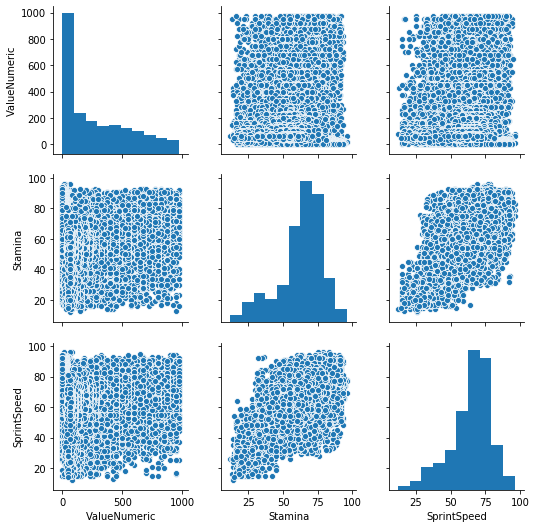

In [16]:
#we can see that there is no clear correlation between value and stamina and sprint speed
import seaborn as sns

fifa_filter = fifa[['ValueNumeric', 'Stamina', 'SprintSpeed']]

sns.pairplot(fifa_filter)


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [17]:
# Your code here:

X = fifa["Potential"] # X our input variables (or independent variables)
y = fifa["ValueNumeric"] # Y means our output/dependent variable
X = sm.add_constant(X) # adding an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # sm.OLS(output, input)
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     685.1
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          5.01e-148
Time:                        18:04:31   Log-Likelihood:            -1.1766e+05
No. Observations:               16634   AIC:                         2.353e+05
Df Residuals:                   16632   BIC:                         2.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        958.1406     25.671     37.324      0.000     907.823    1008.458
Potential     -9.4302      0.360    -26.175      0.000     -10.136      -8.724
==============================================================================
Omnibus:                     1769.479   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2127.821
Skew:                           0.846   Prob(JB):                         0.00
Kurtosis:                       2.543   Cond. No.                         826.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Prob (F-statistic) is the p-value

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [19]:
# Your conclusions here:

#We can see here that this model has a much higher R-squared value — 0.040, meaning that this model explains 4% 
#of the variance in our dependent variable.

pvalue = 5.01e-148
alpha = 0.05

print(pvalue<alpha)

#there is much less than 5% chance that the F-statistic of 685.1 could have occurred by chance under the assumption 
#of a valid Null hypothesis.Thus we reject the Null hypothesis and accept the alternate hypothesis, meaning that
#there is a statistically significant impact on value when talking about potential

True


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

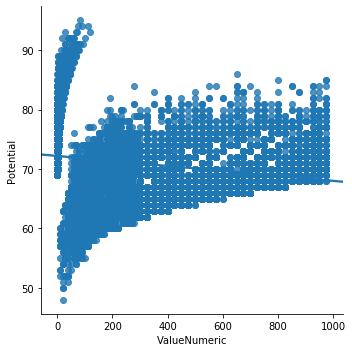

In [20]:
# Your code here:

sns.lmplot('ValueNumeric','Potential', data=fifa)